# PART 1 : DIMENSIONALITY REDUCTION AND FEATURE SELECTION.

## Reading the data.

In [1]:
df1 = read.csv("./Supermarket_Dataset_1 - Sales Data.csv")
# df2 = read.csv("./Supermarket_Sales_Dataset II.csv") - Association analysis
# df3 = read.csv("./Supermarket_Sales_Forecasting - Sales.csv") - Anomaly detection.

## Checking the data

In [2]:
head(df1)

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [3]:
dim(df1)

[1] 1000   16

We have 1000 rows of data and 16 columns

In [4]:
# Checking data structure
str(df1)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

Some variables do not have the right data type.
- Invoice should be a character string
- Date should be date time and not num
- I think that time should also be adjusted

In [5]:
# Converting invoice id to character string.
df1$Invoice.ID = as.character(df1$Invoice.ID)            

In [6]:
# Converting date and time to string

#Combining the two columns and converting the data type to data_time
df1$Date_Time =  strptime(paste(df1$Date, df1$Time), format="%m/%d/%Y %M:%S")

In [7]:
# Checking if all the data types are in order
str(df1)

'data.frame':	1000 obs. of  17 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3 3 3 3 2 2 ...
 $ 

All the variables are in the correct data type, except that we have to drop the uneccesary columns

In [8]:
# Dropping the unecessary Date and Time columns.
df1 = df1[,c(-9,-10)]
names(df1)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Payment"                 "cogs"                   
[11] "gross.margin.percentage" "gross.income"           
[13] "Rating"                  "Total"                  
[15] "Date_Time"

Date and Time have been dropped

## Tidying the dataset

In [9]:
# Importing library
library("Amelia")

Warning message:
"package 'Amelia' was built under R version 3.6.2"Loading required package: Rcpp
Warning message:
"package 'Rcpp' was built under R version 3.6.2"## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


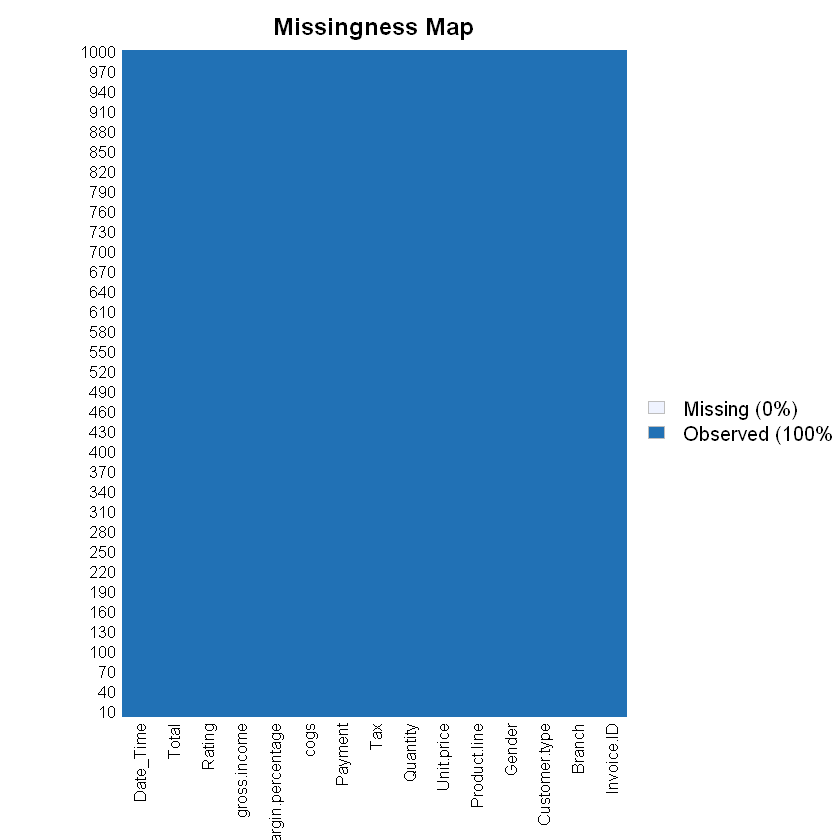

In [10]:
missmap(df1)

In [11]:
# Checking for missng values.

colSums(is.na(df1))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                 Payment 
                      0                       0                       0 
                   cogs gross.margin.percentage            gross.income 
                      0                       0                       0 
                 Rating                   Total               Date_Time 
                      0                       0                       0

There are no missing values. Yaaay!!!!

In [12]:
# Checking for duplicated values.
df1_dup = df1[duplicated(df1), ]
dim(df1_dup)

[1]  0 15

There are also no duplicated values

In [13]:
# Checking for outliers in the numerical columns
# Importing the library dplyr

library(dplyr)
df1_num <- select_if(df1, is.numeric) 

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



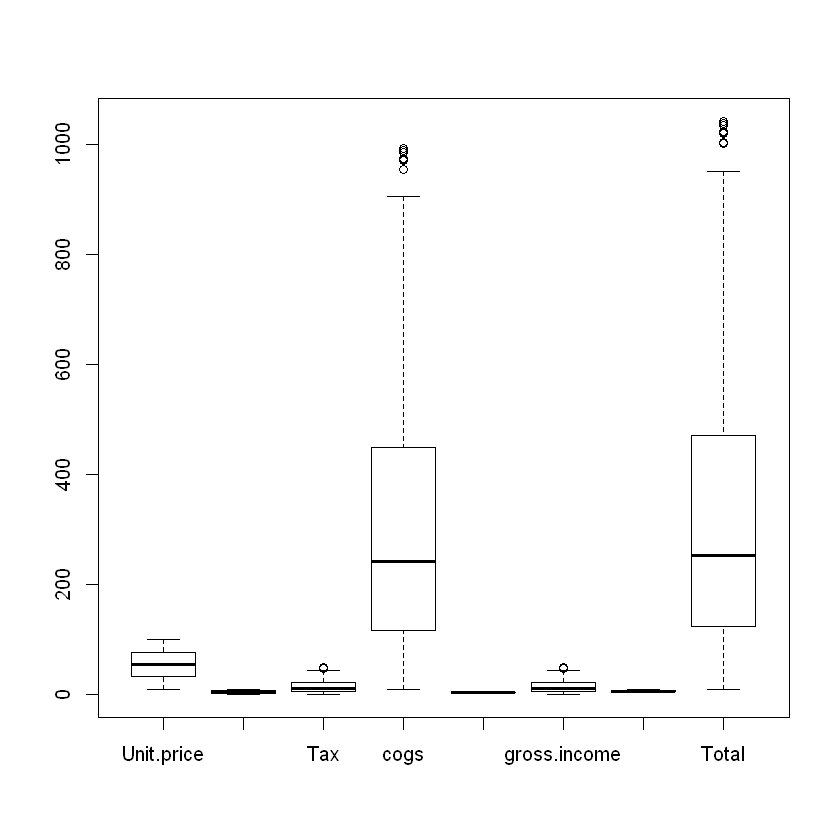

In [14]:
# Plotting boxplot to check for outliers

boxplot(df1_num)

Most of the variables do not have outliers and those that have are very few. 
Since they are few, there is no major significance in dropping them

## Implementing Solution

### Dimensionality Reduction 

#### Using PCA

In [15]:
# We will use the numrical data (df1_num) and drop the categorical.
# Since algo cannot rescale a constant/zero column to unit variance, we drop gross.margin. production
# It only has one value 4.761905

# We then pass df1_num to the prcomp(). 
# We set two arguments, center and scale to be TRUE then preview our object with summary

df1_num.pca <- prcomp(df1_num[, c(-5)], center = TRUE, scale. = TRUE)
summary(df1_num.pca)

Importance of components:
                          PC1    PC2    PC3     PC4       PC5       PC6
Standard deviation     2.2185 1.0002 0.9939 0.30001 3.132e-16 1.457e-16
Proportion of Variance 0.7031 0.1429 0.1411 0.01286 0.000e+00 0.000e+00
Cumulative Proportion  0.7031 0.8460 0.9871 1.00000 1.000e+00 1.000e+00
                             PC7
Standard deviation     3.219e-17
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

- We have 7 principal components. 
- Each explain a percentate of the total variation of the dataset'
- PC1 explains 70.31% of the total variance, which means that more two-thirds 
- of the information in the dataset can be encapsulated by just that one Principal Component. 
- PC2 explains 14.29 of the variance and so on.

In [16]:
# We then call str() to have a look at the PCA object.

str(df1_num.pca)

List of 5
 $ sdev    : num [1:7] 2.22 1.00 9.94e-01 3.00e-01 3.13e-16 ...
 $ rotation: num [1:7, 1:7] -0.292 -0.325 -0.45 -0.45 -0.45 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "Unit.price" "Quantity" "Tax" "cogs" ...
  .. ..$ : chr [1:7] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:7] 55.67 5.51 15.38 307.59 15.38 ...
  ..- attr(*, "names")= chr [1:7] "Unit.price" "Quantity" "Tax" "cogs" ...
 $ scale   : Named num [1:7] 26.49 2.92 11.71 234.18 11.71 ...
  ..- attr(*, "names")= chr [1:7] "Unit.price" "Quantity" "Tax" "cogs" ...
 $ x       : num [1:1000, 1:7] -2.005 2.306 -0.186 -1.504 -2.8 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:7] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


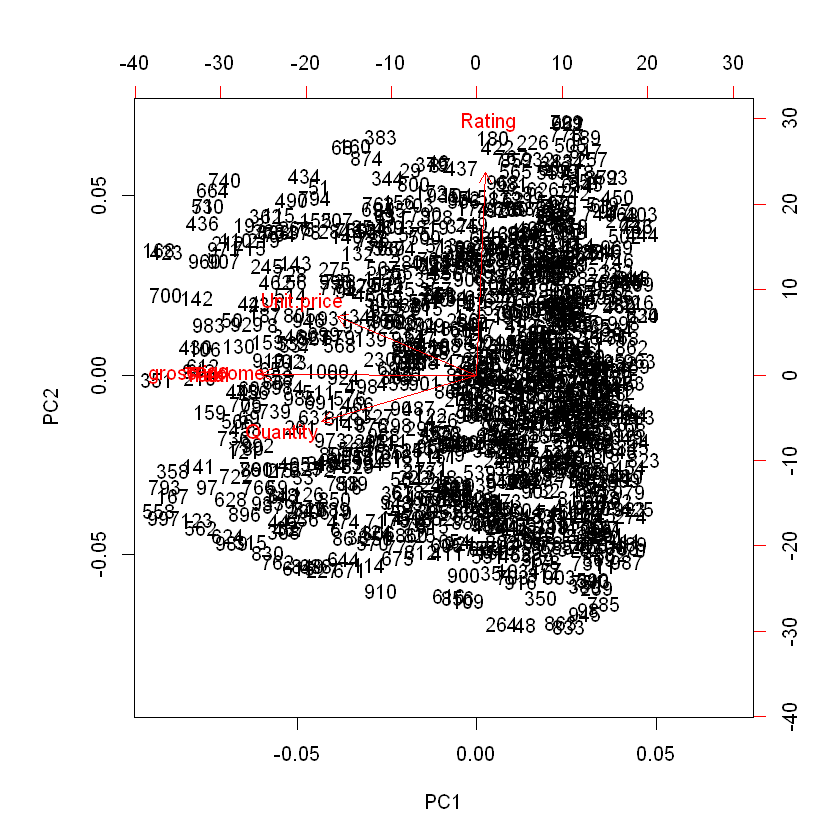

In [17]:
biplot(df1_num.pca)

#### Using T-SNE

In [18]:
# looking at the data
head(df1)

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,Date_Time
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,Ewallet,522.83,4.761905,26.1415,9.1,548.9715,2019-01-05 00:13:08
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,Cash,76.40,4.761905,3.8200,9.6,80.2200,2019-03-08 00:10:29
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,Credit card,324.31,4.761905,16.2155,7.4,340.5255,2019-03-03 00:13:23
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,Ewallet,465.76,4.761905,23.2880,8.4,489.0480,2019-01-27 00:20:33
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,Ewallet,604.17,4.761905,30.2085,5.3,634.3785,2019-02-08 00:10:37
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,Ewallet,597.73,4.761905,29.8865,4.1,627.6165,2019-03-25 00:18:30


In [19]:
# Loading our tnse library

library(Rtsne)

Warning message:
"package 'Rtsne' was built under R version 3.6.3"

In [20]:
head(df1_num)

Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
74.69,7,26.1415,522.83,4.761905,26.1415,9.1,548.9715
15.28,5,3.8200,76.40,4.761905,3.8200,9.6,80.2200
46.33,7,16.2155,324.31,4.761905,16.2155,7.4,340.5255
58.22,8,23.2880,465.76,4.761905,23.2880,8.4,489.0480
86.31,7,30.2085,604.17,4.761905,30.2085,5.3,634.3785
85.39,7,29.8865,597.73,4.761905,29.8865,4.1,627.6165


In [22]:
set.seed(42)
tsne_out <- Rtsne(iris_matrix,pca=FALSE,perplexity=30,theta=0.0) 

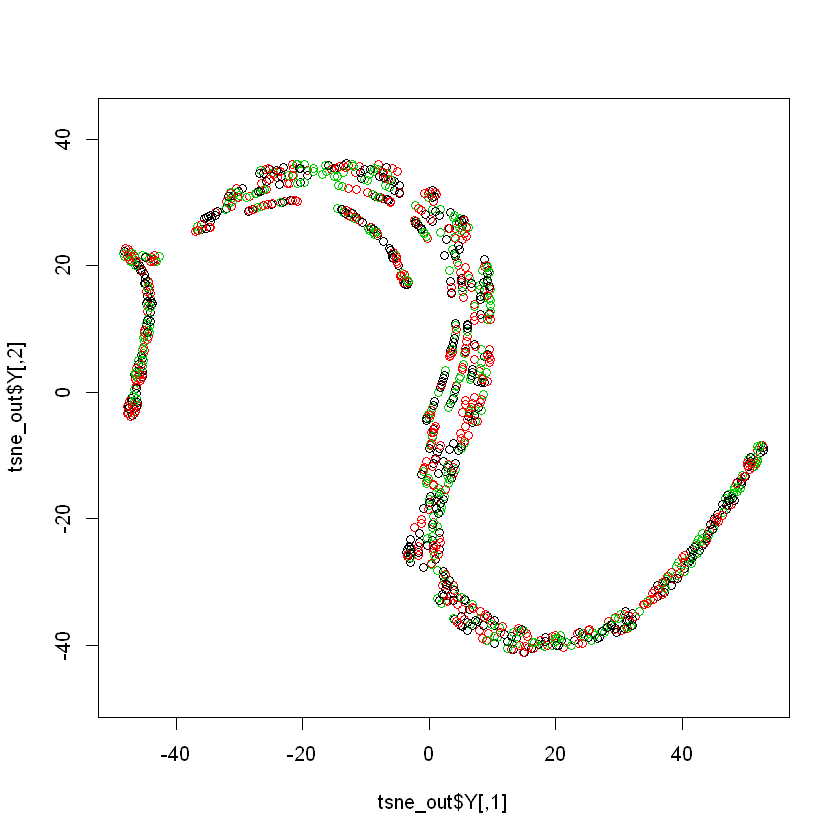

In [23]:
# Show the objects in the 2D tsne representation
plot(tsne_out$Y,col=iris_unique$Species, asp=1)

### Feature Selection

In [31]:
# Creating twin data to perform feature selection on.
df1_fs = df1

# Converting factors to numeric
a = c("Branch", "Customer.type", "Gender", "Product.line", "Payment")
for (i in a) {
    df1_fs[, i] = as.numeric(df1_fs[, i])
}

In [32]:
# Previewing the data
str(df1_fs)
head(df1_fs)

'data.frame':	1000 obs. of  15 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : num  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : num  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : num  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : num  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment                : num  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ Date_Time              : POSIXlt, format: "2019-01-05 00:13:

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,Date_Time
750-67-8428,1,1,1,4,74.69,7,26.1415,3,522.83,4.761905,26.1415,9.1,548.9715,2019-01-05 00:13:08
226-31-3081,3,2,1,1,15.28,5,3.8200,1,76.40,4.761905,3.8200,9.6,80.2200,2019-03-08 00:10:29
631-41-3108,1,2,2,5,46.33,7,16.2155,2,324.31,4.761905,16.2155,7.4,340.5255,2019-03-03 00:13:23
123-19-1176,1,1,2,4,58.22,8,23.2880,3,465.76,4.761905,23.2880,8.4,489.0480,2019-01-27 00:20:33
373-73-7910,1,2,2,6,86.31,7,30.2085,3,604.17,4.761905,30.2085,5.3,634.3785,2019-02-08 00:10:37
699-14-3026,3,2,2,1,85.39,7,29.8865,3,597.73,4.761905,29.8865,4.1,627.6165,2019-03-25 00:18:30


In [33]:
# loading the corrplot package for plotting
library(corrplot)
library(caret)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [34]:
# Calculating the correlation matrix
# ---
#
correlationMatrix <- cor(df1_num[, -5])

In [35]:
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

In [36]:
# Highly correlated attributes
highlyCorrelated
names(df1_num[, -5][,highlyCorrelated])

[1] 4 7 3

[1] "cogs"  "Total" "Tax"

- The 3 variables 'cogs' 'Total' and 'Tax' are highly correlated so they can be dropped

In [40]:
# Removing Redundant Features 
# ---
# 
df1_num_new <- df1_num[, -5][-highlyCorrelated]
head(df1_num_new)

Unit.price,Quantity,gross.income,Rating
74.69,7,26.1415,9.1
15.28,5,3.8200,9.6
46.33,7,16.2155,7.4
58.22,8,23.2880,8.4
86.31,7,30.2085,5.3
85.39,7,29.8865,4.1


- The new data set has fewer variables.
- The variables that were retained do not have much correlsation and this can be shown by the correlation plots below

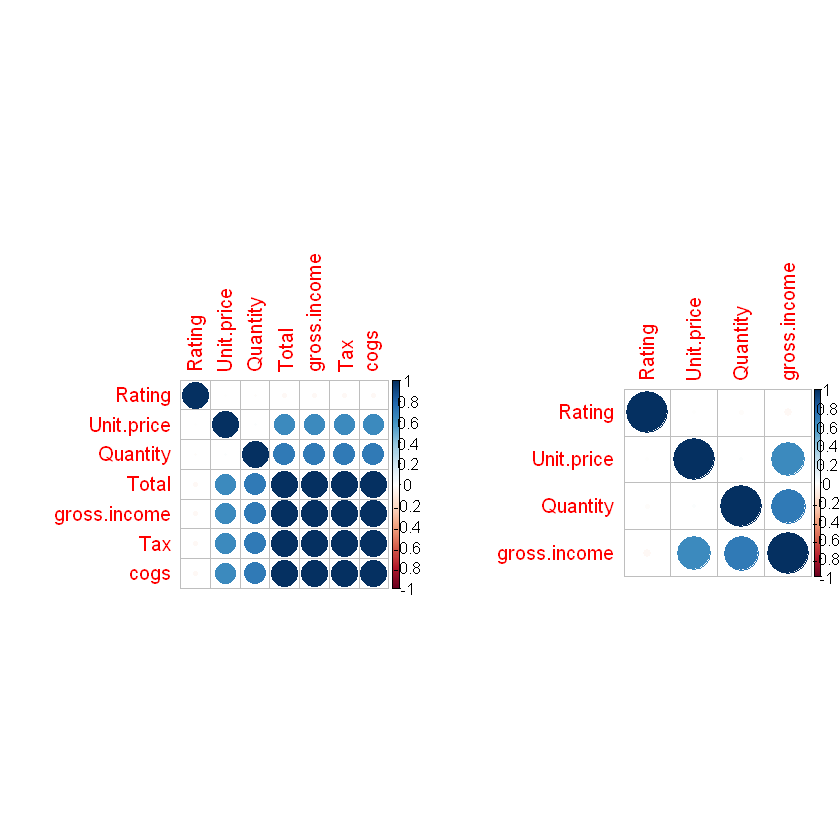

In [38]:
# Performing our graphical comparison
# ---
# 
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(df1_num_new), order = "hclust")